In [1]:
import cv2
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
path1 = 'dataset/23n88.png'
path2 = 'dataset/23mdg.png'

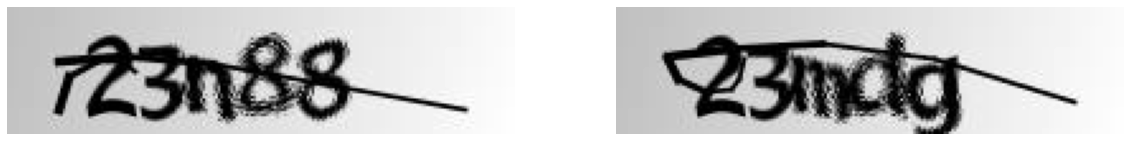

In [3]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)    
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.imshow(img1, 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img2, 'gray')
plt.axis('off')
plt.show()

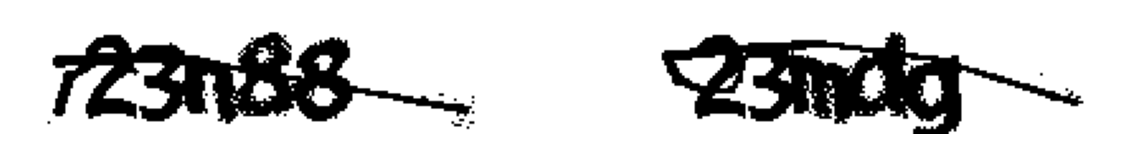

In [4]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.imshow(thresh_img1, 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(thresh_img2, 'gray')
plt.axis('off')
plt.show()

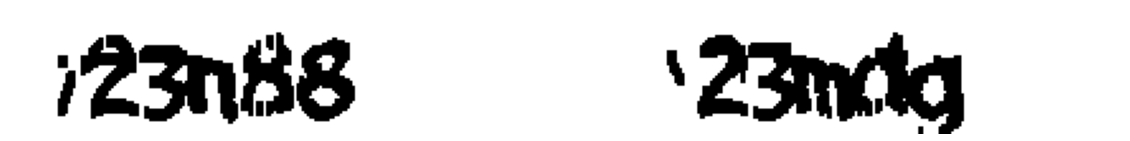

In [5]:
closing_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
closing_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.imshow(closing_img1, 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(closing_img2, 'gray')
plt.axis('off')
plt.show()

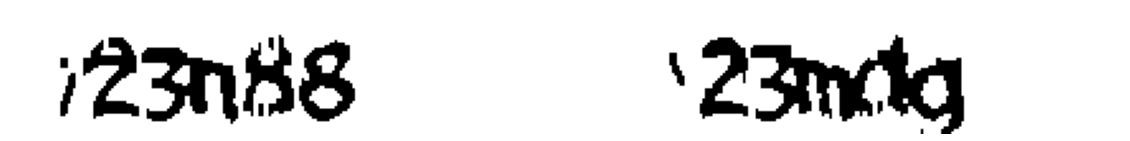

In [6]:
dilate_img1 = cv2.dilate(closing_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(closing_img2, np.ones((2,2), np.uint8), iterations = 1)
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.imshow(dilate_img1, 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(dilate_img2, 'gray')
plt.axis('off')
plt.show()

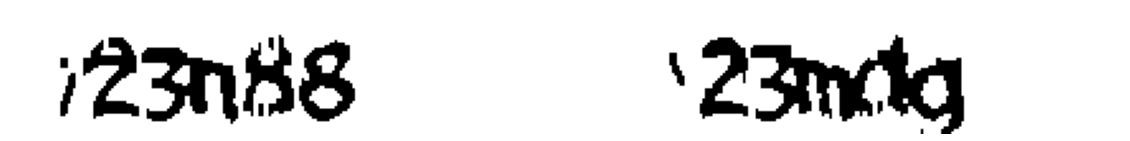

In [7]:
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (1,1), 0)
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.imshow(gauss_img1, 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(gauss_img2, 'gray')
plt.axis('off')
plt.show()

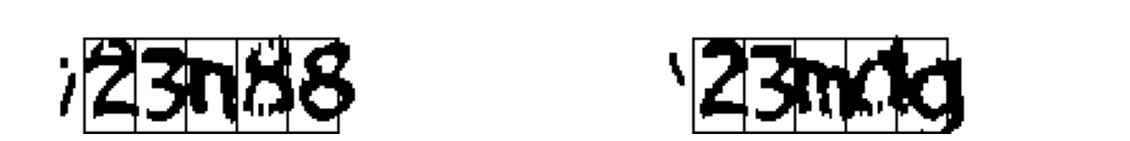

In [8]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

cv2.rectangle(gauss_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img2, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img2, (110,12),(130,49),0, 1)
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.imshow(gauss_img1, 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(gauss_img2, 'gray')
plt.axis('off')
plt.show()

In [9]:
import os
from PIL import Image
from keras.preprocessing.image import img_to_array, ImageDataGenerator

In [10]:
X = []
y = []
path = "dataset"
#Image Processing Part
for image in os.listdir(path) :
    if image[6:] != 'png' :
        continue
    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
    img = cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)
    img = cv2.GaussianBlur(img, (1,1), 0)
    #Seperate Character
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)

In [11]:
print(X.shape)
print(y.shape)

(5200, 40, 20, 1)
(5200,)


In [12]:
X /= 255.0

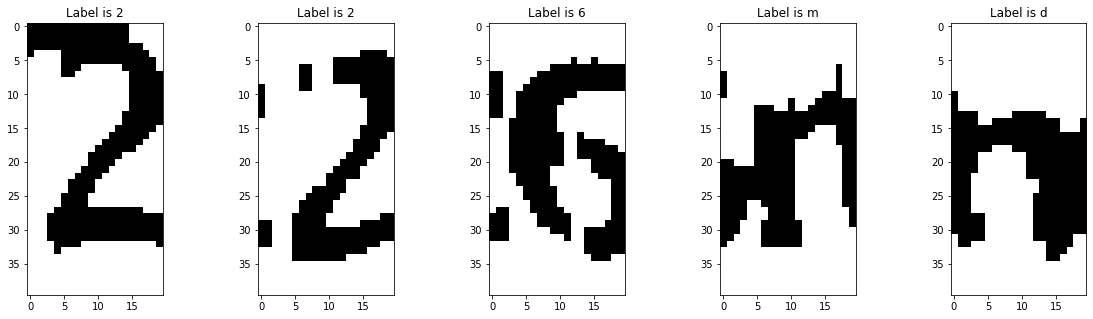

In [13]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.show()

In [14]:
temp = set(y)
temp_df = pandas.DataFrame({'labels' : [t for t in temp], 'Count' : [len(y[y==t]) for t in temp]})
temp_df

,labels,Count
0,e,235
1,6,259
2,c,262
3,b,240
4,8,264
5,x,264
6,m,275
7,d,259
8,g,271
9,7,258


In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse = False).fit_transform(y_combine.reshape(len(y_combine),1))
print('letter n : ' + str(y[1]))
print('label : ' + str(y_combine[1]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[1]])))

letter n : 2
label : 0
Count : 265


In [16]:
info = {y_combine[i] : y[i] for i in range(len(y))}

In [17]:
print(X.shape)
print(y_one_hot.shape)  # one hot encoded form

(5200, 40, 20, 1)
(5200, 19)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

In [19]:
y_temp = np.argmax(y_test, axis = 1)
temp = set(y_temp)
temp_df = pandas.DataFrame({'labels' : [info[t] for t in temp], 'Count' : [len(y_temp[y_temp == t]) for t in temp]})

In [20]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization

from keras.layers import Dropout
from keras.layers import Input

In [21]:
X_train = np.reshape(X_train, (4160, 40*20*1))
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)
print(X_train.shape, " ", y_train.shape)

(8037, 800)   (8037, 19)


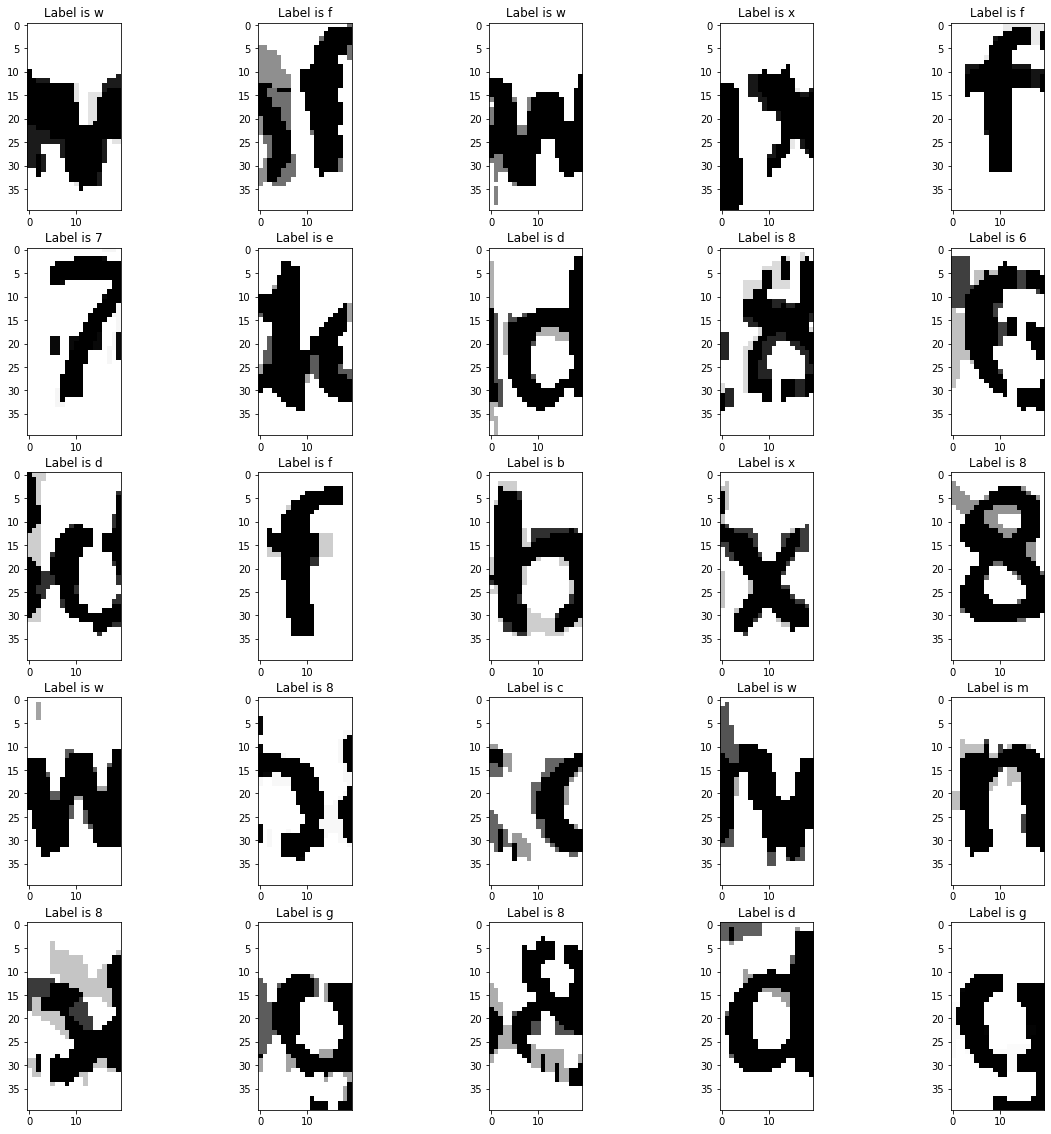

In [22]:
X_train = np.reshape(X_train, (8037, 40, 20, 1))
plt.figure(figsize = (20,20))

hi = 7800
lo = 5000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(X_train[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(y_train[x])]))
plt.show()

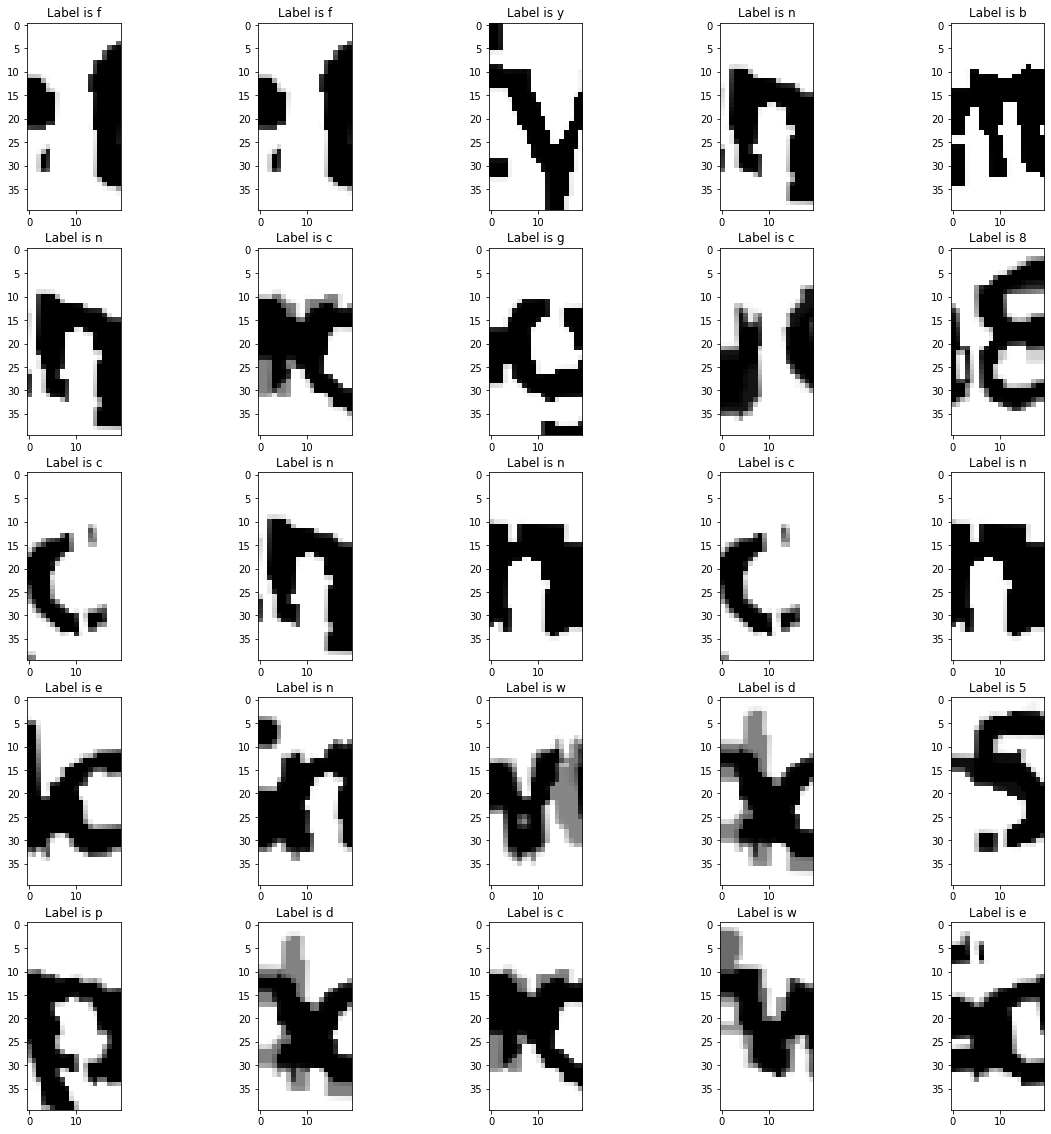

In [23]:
traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
traingen.fit(X_train)
train_set = traingen.flow(X_train, y_train)
trainX, trainy = train_set.next()

plt.figure(figsize = (20,20))

hi = 32
lo = 0

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(trainX[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(trainy[x])]))
plt.show()

In [24]:
model = Sequential()
model.add(Input((40, 20, 1,)))
model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(16, (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(y_train.shape[1], activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 20, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 40, 20, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 40, 20, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 10, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 10, 32)        36896     
                                                                 
 batch_normalization_1 (Batc  (None, 20, 10, 32)       1

Epoch 1/15
251/251 [==============================] - 26s 99ms/step - loss: 2.3215 - accuracy: 0.3088 - val_loss: 2.9424 - val_accuracy: 0.0913
Epoch 2/15
251/251 [==============================] - 26s 105ms/step - loss: 1.3288 - accuracy: 0.6229 - val_loss: 1.4582 - val_accuracy: 0.5942
Epoch 3/15
251/251 [==============================] - 25s 98ms/step - loss: 0.9830 - accuracy: 0.7213 - val_loss: 0.8943 - val_accuracy: 0.7279
Epoch 4/15
251/251 [==============================] - 25s 98ms/step - loss: 0.8121 - accuracy: 0.7691 - val_loss: 0.6689 - val_accuracy: 0.7971
Epoch 5/15
251/251 [==============================] - 25s 101ms/step - loss: 0.7226 - accuracy: 0.7911 - val_loss: 0.6904 - val_accuracy: 0.7683
Epoch 6/15
251/251 [==============================] - 23s 91ms/step - loss: 0.6619 - accuracy: 0.8064 - val_loss: 0.6530 - val_accuracy: 0.7923
Epoch 7/15
251/251 [==============================] - 23s 93ms/step - loss: 0.6264 - accuracy: 0.8188 - val_loss: 0.6999 - val_accurac

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

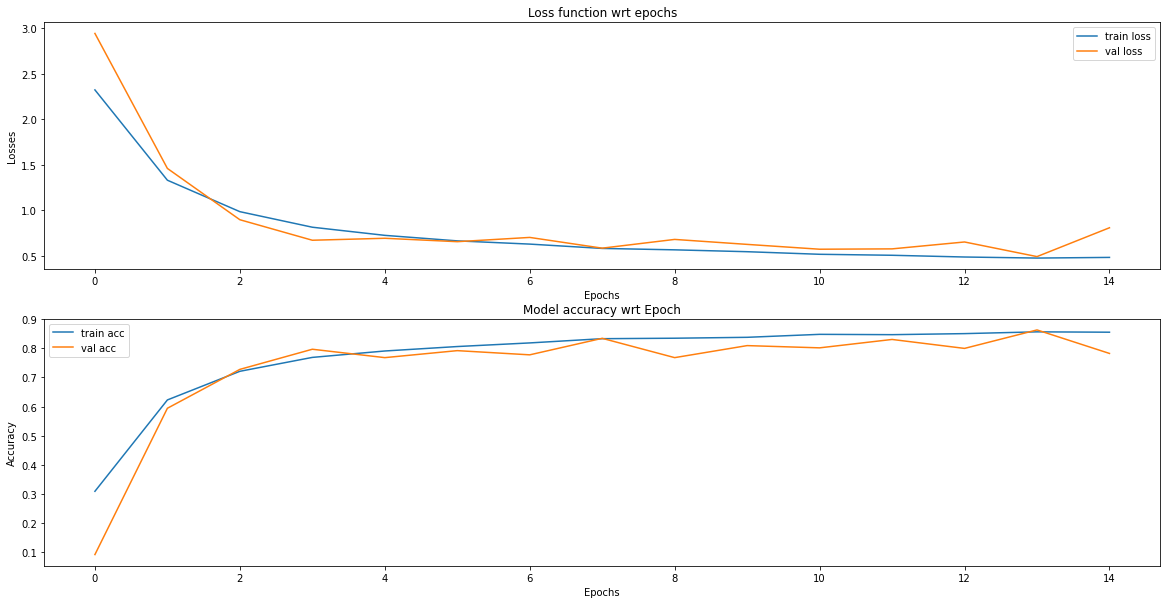

In [25]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)
history = model.fit(traingen.flow(X_train, y_train, batch_size = 32), validation_data = (X_test, y_test), epochs = 15, steps_per_epoch = len(X_train)/32)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

In [26]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)

In [27]:
from sklearn.metrics import accuracy_score, classification_report
target_name = []
for i in sorted(info) :
    target_name.append(info[i])
target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [28]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))

Accuracy : 0.7826923076923077
              precision    recall  f1-score   support

           2       0.90      0.93      0.92        58
           3       1.00      0.63      0.77        57
           4       0.96      0.91      0.93        54
           5       0.97      0.67      0.79        54
           6       0.91      0.82      0.86        62
           7       0.96      0.89      0.93        56
           8       1.00      0.84      0.91        55
           b       0.40      1.00      0.58        42
           c       0.88      0.15      0.25        47
           d       0.49      0.92      0.64        50
           e       0.97      0.74      0.84        42
           f       0.90      0.96      0.93        46
           g       0.96      0.96      0.96        50
           m       0.58      0.61      0.59        61
           n       0.67      0.71      0.69       102
           p       0.79      0.92      0.85        52
           w       0.72      0.85      0.78        

In [29]:
def test(img_path) :    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
    img = cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)
    img = cv2.GaussianBlur(img, (1,1), 0)
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    test_X = []
    for i in range(5) :
        test_X.append(img_to_array(Image.fromarray(image_list[i])))
    
    test_X = np.array(test_X)
    test_X/= 255.0
    
    test_y = model.predict(test_X)
    test_y = np.argmax(test_y, axis = 1)
    
    for res in test_y :
        print(info[res])
    print(img_path[-9:])

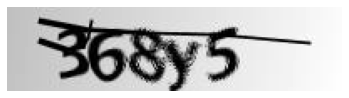

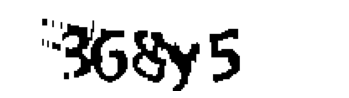

3
6
8
y
5
368y5.png


In [30]:
test('dataset/368y5.png')

In [31]:
model.save('Captcha_model')

INFO:tensorflow:Assets written to: Captcha_model\assets


In [94]:
keys = []
for i in info.keys():
    keys.append(str(i))
keys
values = []
for i in info.values():
    values.append(i)
values
infos = {}
for i in range(len(keys)):
    infos[keys[i]] = values[i]
f = open("info.txt", "a")
f.write(json.dumps(infos))
f.close()